# **Titanic Passenger Survival Prediction**
### **Predicting Passenger Survival on the Titanic using Decision Tree Algorithm**
## **Mercy Consolate Akello**
## **2024-01-10**

## **Introduction**

**Welcome to the task of predicting passenger survival on the Titanic using the Titanic dataset.This project serves as a classic beginner's project, offering readily available data for analysis and modeling. The dataset provides valuable information about individual passengers, including their age, gender, ticket class, fare, cabin, and survival status. By leveraging this dataset, we aim to build a predictive model that can accurately determine whether a passenger survived or not during the tragic Titanic disaster.**

**The Titanic dataset presents an excellent opportunity to explore the field of data analysis and machine learning. It allows us to delve into the factors that influenced passenger survival and understand the patterns and correlations within the data. By utilizing various machine learning algorithms and techniques, we can develop a robust model that can effectively predict survival outcomes based on the provided features.**

**This project not only offers a chance to gain practical experience in data analysis and modeling but also provides insights into the historical event of the Titanic. By examining the dataset and building a predictive model, we can uncover valuable information about the factors that played a significant role in determining passenger survival. This knowledge can contribute to our understanding of the disaster and potentially inform future safety measures in similar scenarios.**

**Throughout this task, we will explore the Titanic dataset, preprocess the data, and apply suitable machine learning algorithms to build a predictive model. By analyzing the features and their relationships, we aim to create a model that accurately predicts whether a passenger survived or not. This project serves as an excellent starting point for beginners in the field of data analysis and machine learning, offering a practical and engaging application of these techniques.**

**Let's embark on this journey of analyzing the Titanic dataset and building a predictive model that sheds light on the factors influencing passenger survival during this historic event.**



## **Load data**

In [4]:
library(readr)
titanic <- read_csv("/content/titanic.csv")

Rows: 418 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**The dataset contains 418 observations and 12 variables.**

### **Check for missing data**

In [5]:
colSums(is.na(titanic))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0           0 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

### **Check for duplicates**

In [6]:
duplicated(titanic)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

### **Remove unnecessary variables**

In [7]:
library(dplyr)
titanic=titanic%>%
  select(-c('PassengerId','Name','Ticket','Cabin'))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### **Convert data type**

In [8]:
titanic$Survived=as.factor(titanic$Survived)
titanic$Pclass=as.factor(titanic$Pclass)
titanic$Sex=as.factor(titanic$Sex)
titanic$Embarked=as.factor(titanic$Embarked)

## **Exploratory Data Analysis**

### **Numeric variable**

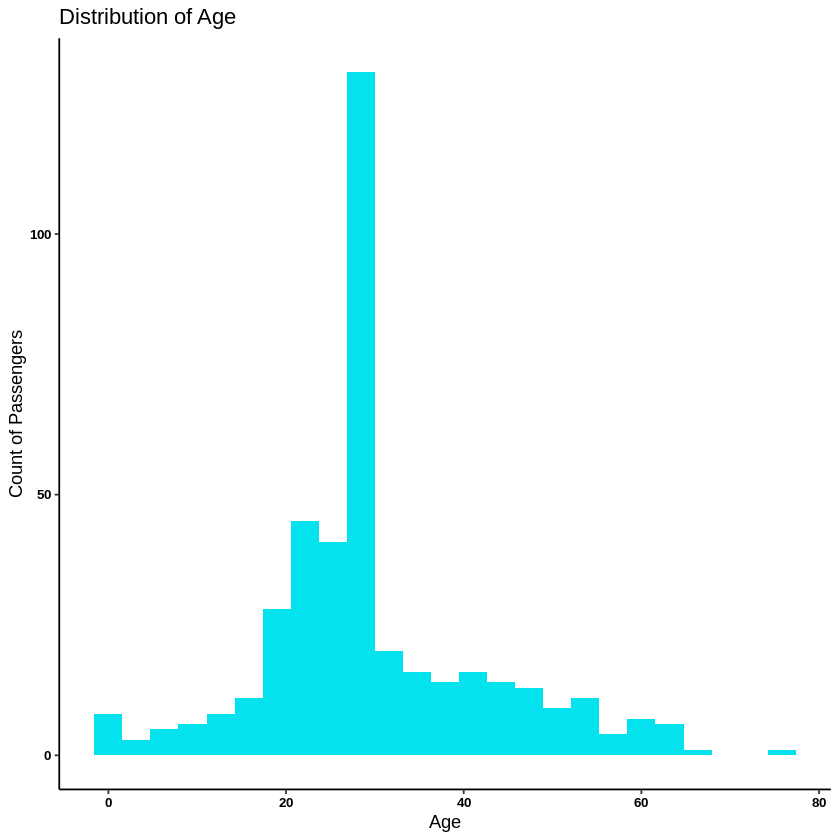

In [9]:
library(ggplot2)

ggplot(titanic,aes(Age))+
  geom_histogram(bins=25,fill='#03E2ED')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Age',y='Count of Passengers')

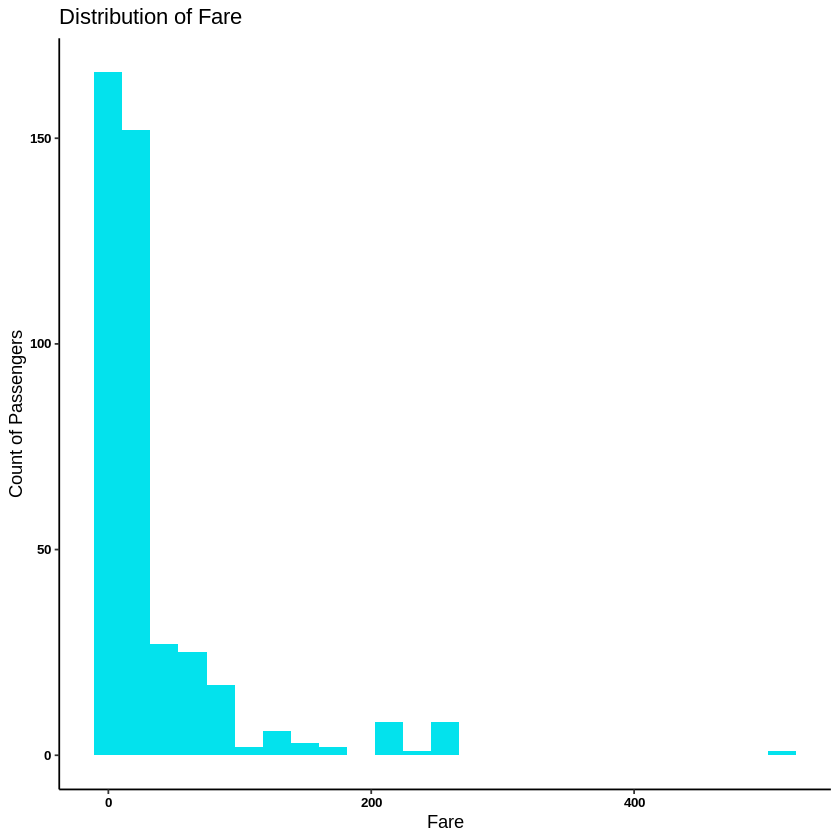

In [10]:
ggplot(titanic,aes(Fare))+
  geom_histogram(bins=25,fill='#03E2ED')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Fare',y='Count of Passengers')

`geom_smooth()` using formula = 'y ~ x'


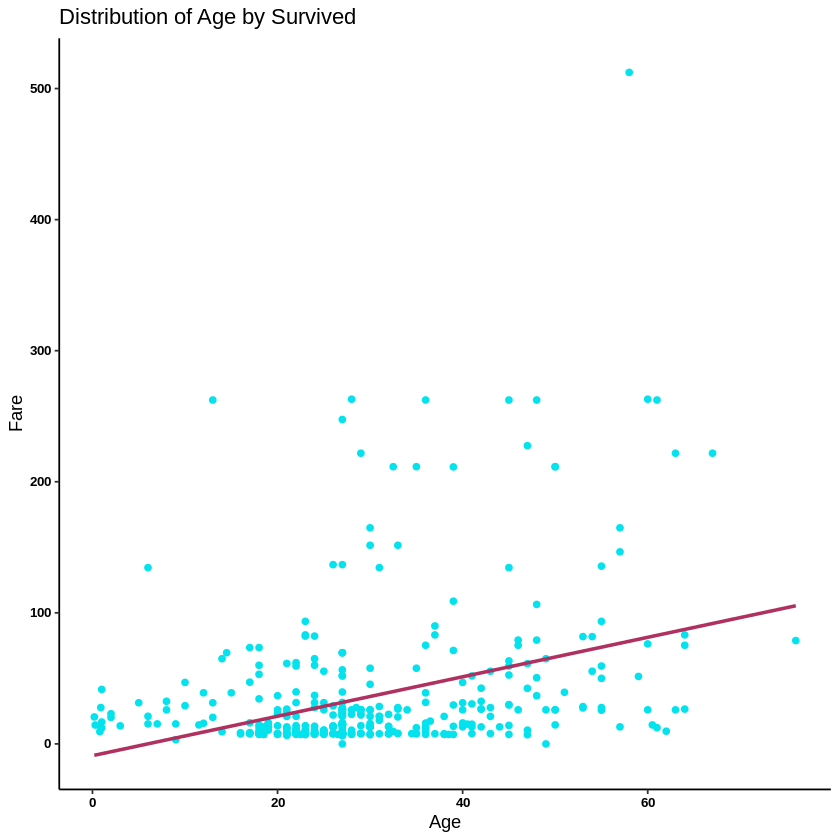

In [11]:
ggplot(titanic,aes(Age,Fare))+
  geom_point(color='#03E2ED')+
  geom_smooth(method = 'lm', se=F,color='maroon')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Age by Survived')

### **Categorical variable**

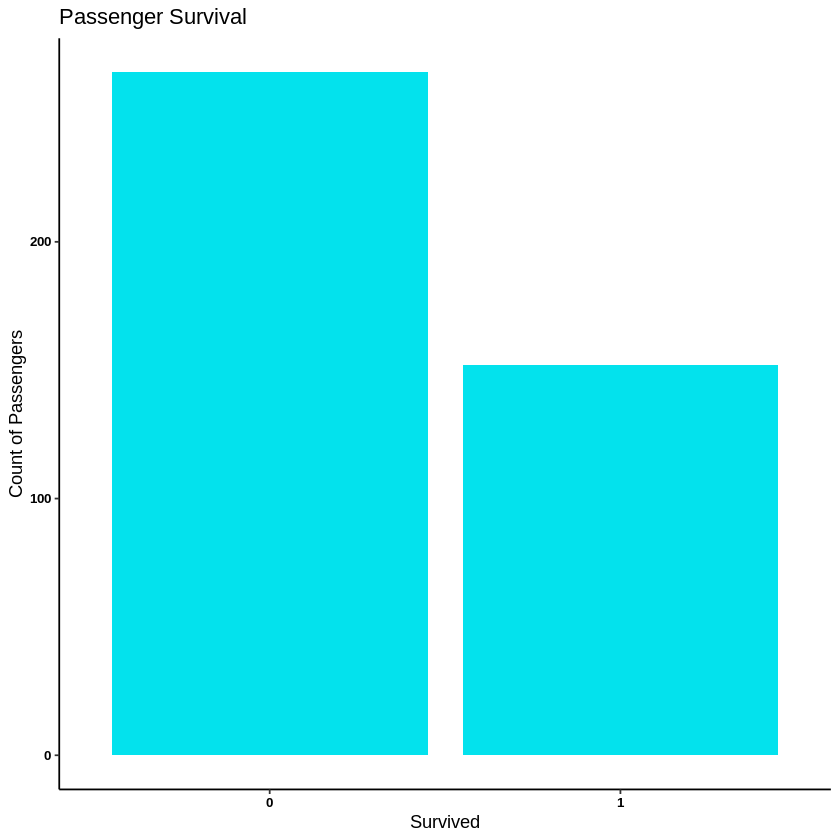

In [12]:
ggplot(titanic,aes(Survived))+
  geom_bar(fill='#03E2ED')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Passenger Survival',y='Count of Passengers')

**1 means The Passenger Survived.**

**0 means The Passenger did not Survive.**

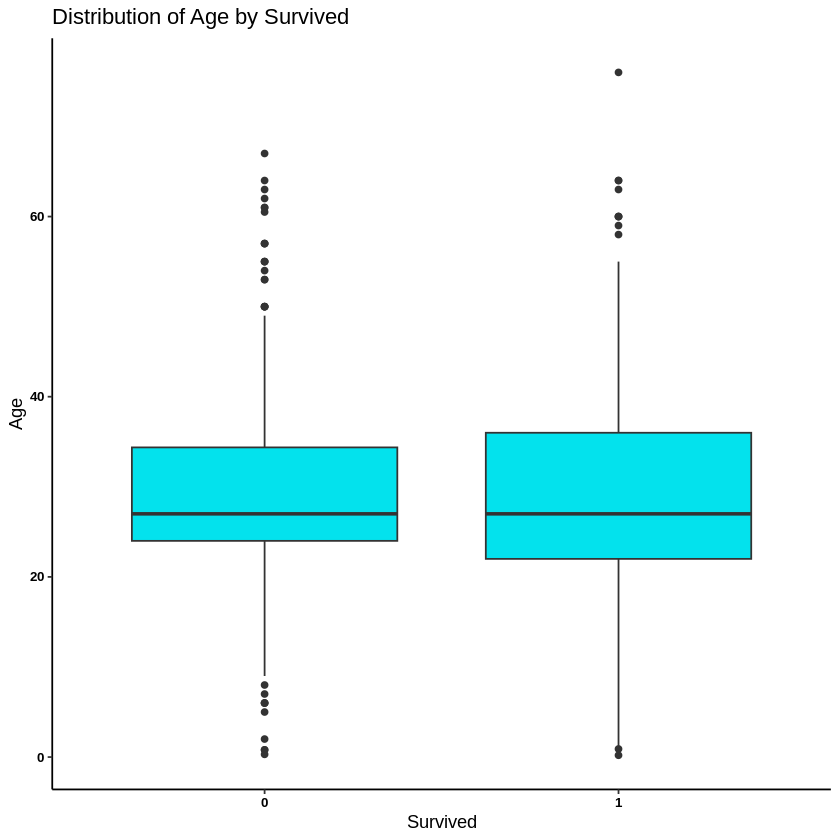

In [13]:
ggplot(titanic,aes(Survived,Age))+
  geom_boxplot(fill='#03E2ED')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Age by Survived')

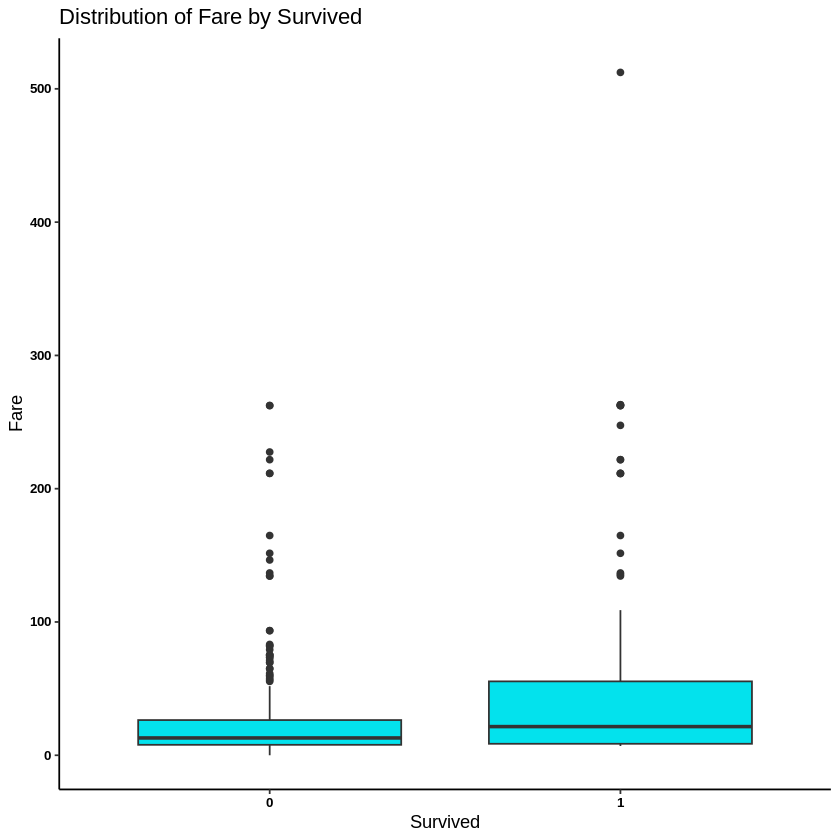

In [14]:
ggplot(titanic,aes(Survived,Fare))+
  geom_boxplot(fill='#03E2ED')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Fare by Survived')

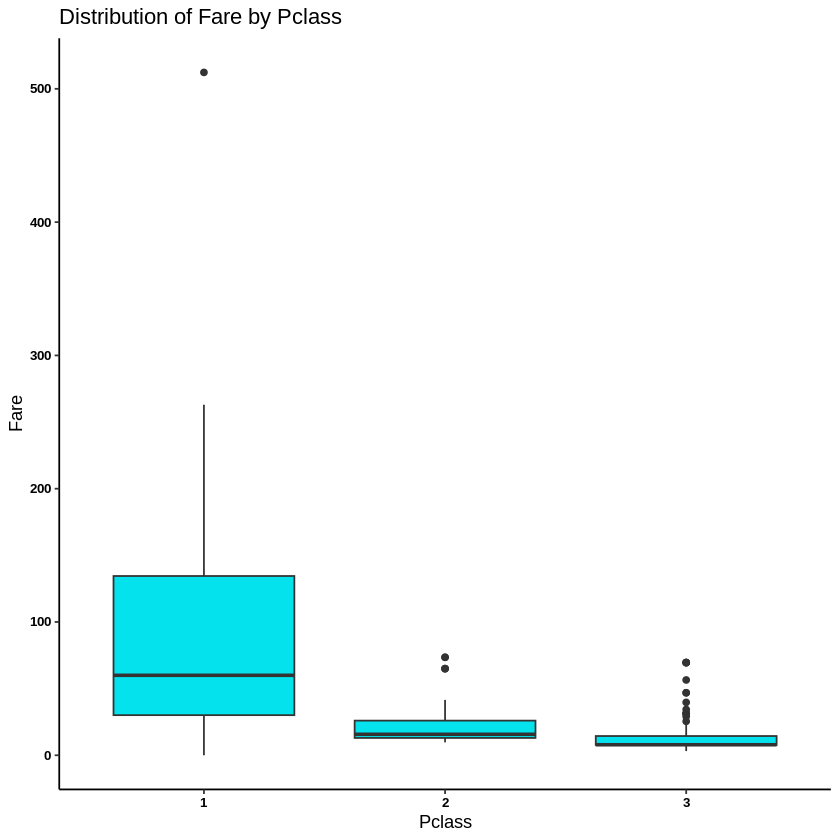

In [15]:
ggplot(titanic,aes(Pclass,Fare))+
  geom_boxplot(fill='#03E2ED')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Fare by Pclass')

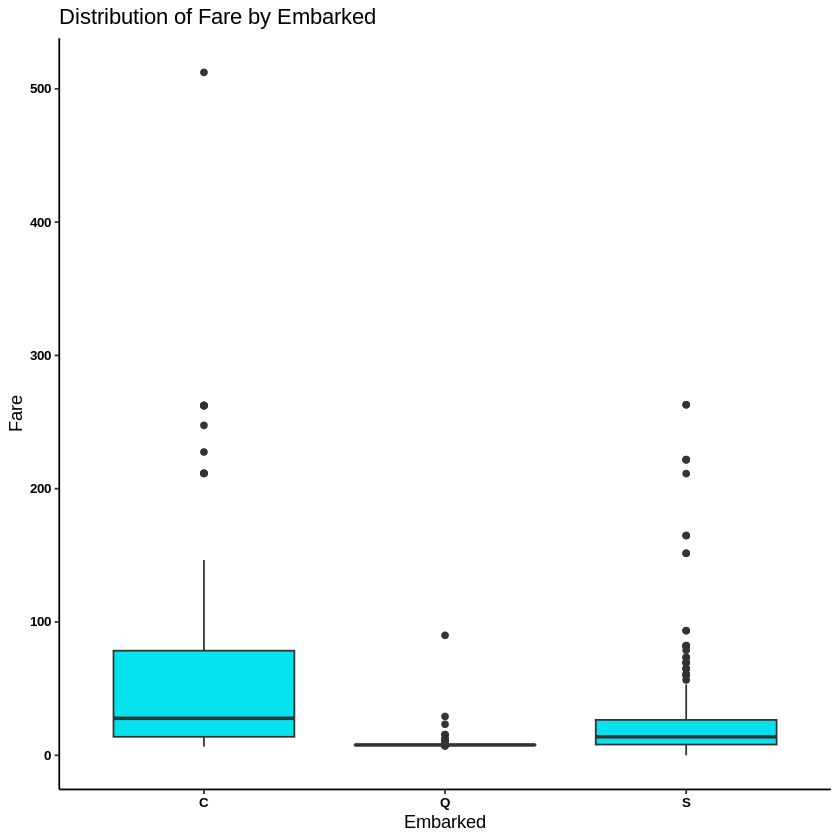

In [16]:
ggplot(titanic,aes(Embarked,Fare))+
  geom_boxplot(fill='#03E2ED')+
  theme_classic()+
  theme(axis.text.x=element_text(size=8,face = 'bold',color='black'),
        axis.text.y=element_text(size=8,face='bold',color='black'))+
  labs(title = 'Distribution of Fare by Embarked')

In [ ]:
# Only run the three lines of code below if you don't have the package already installed.
#install.packages("caTools")
#install.packages("rpart")
#install.packages("caret")

## **Split dataset into two**

In [21]:
library(caTools)
set.seed(13579)
sample=sample.split(titanic$Survived,SplitRatio=.70)
train=subset(titanic,sample==TRUE)
test=subset(titanic,!sample==TRUE)

## **Build a Decision Tree model**

In [22]:
library(rpart)
dt.model=rpart(Survived~.,train)

## **Make a prediction using test data**

In [23]:
dt.model.test=predict(dt.model, test, type='class')

## **Model Performance**

In [24]:
library(caret)
tad=table(test$Survived, dt.model.test)
confusionMatrix(tad)

Loading required package: lattice



Confusion Matrix and Statistics

   dt.model.test
     0  1
  0 80  0
  1  0 46
                                     
               Accuracy : 1          
                 95% CI : (0.9711, 1)
    No Information Rate : 0.6349     
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6349     
         Detection Rate : 0.6349     
   Detection Prevalence : 0.6349     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

## **Conclusion**
**In conclusion, the Decision Tree model proved to be highly effective in predicting the survival of passengers on the Titanic. With an impressive accuracy rate of 100%, this model demonstrated its ability to accurately classify passengers into survival categories.**

**This outcome highlights the potential of using machine learning algorithms, such as the Decision Tree model, to analyze and predict complex scenarios like the Titanic disaster. By leveraging the power of data and advanced analytics, we can gain valuable insights and make informed decisions in various domains. The success of this model underscores the importance of utilizing advanced techniques in data analysis and prediction tasks.**